# Paraview avancé
Dans ce document, vous trouverez des informations concernant l'utilisation de Paraview en mode client-serveur pour de la visualisation de données complexes. Les indications sont relatives à l'utilisation des grappes de calcul à Calcul Canada, mais sont applicables dans la vaste majorité à d'autres serveurs distants. 

Paraview peut servir à un grand nombre de domaines, allant de l'astrophysique à la dynamique moléculaire en passant par l'océanographie. Voici quelques exemples de visualisations intéressantes:
* https://ccvis.netlify.app
* https://scivis2021.netlify.app


# 1. Architecture de Paraview: Local, connexion à un serveur distant
Vous devriez normalement être familiers avec l'interface de Paraview sur votre ordinateur. Vous l'avez peut-être utilisé pour créer des graphiques à 1, 2 ou 3 dimensions. Vous avez même peut-être fait quelques animations simples. Si ce n'est pas le cas, nous vous recommandons d'explorer les formations débutants à Calcul Québec et autres partenaires régionaux de Calcul Canada.

Lorsque vous utilisez Paraview sur votre ordinateur local, les parties _Serveur de données_, _Serveur de rendu_ et _Client_ se trouvent tous sur la même machine. Cependant, il se pourrait que vous ayez à faire face à des limitation en mémoire RAM ou en capacité de CPU ou GPU par exemple. Lorsque vous avez affaire à de plus gros jeux de données, vous pouvez séparer ces parties et traiter les données à distance à partir du Client sur votre ordinateur. 

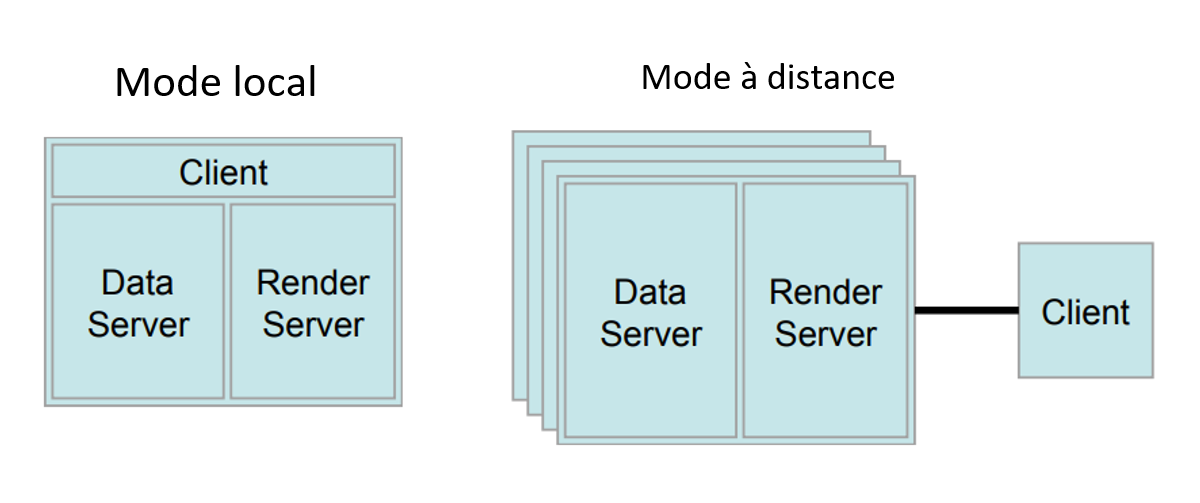

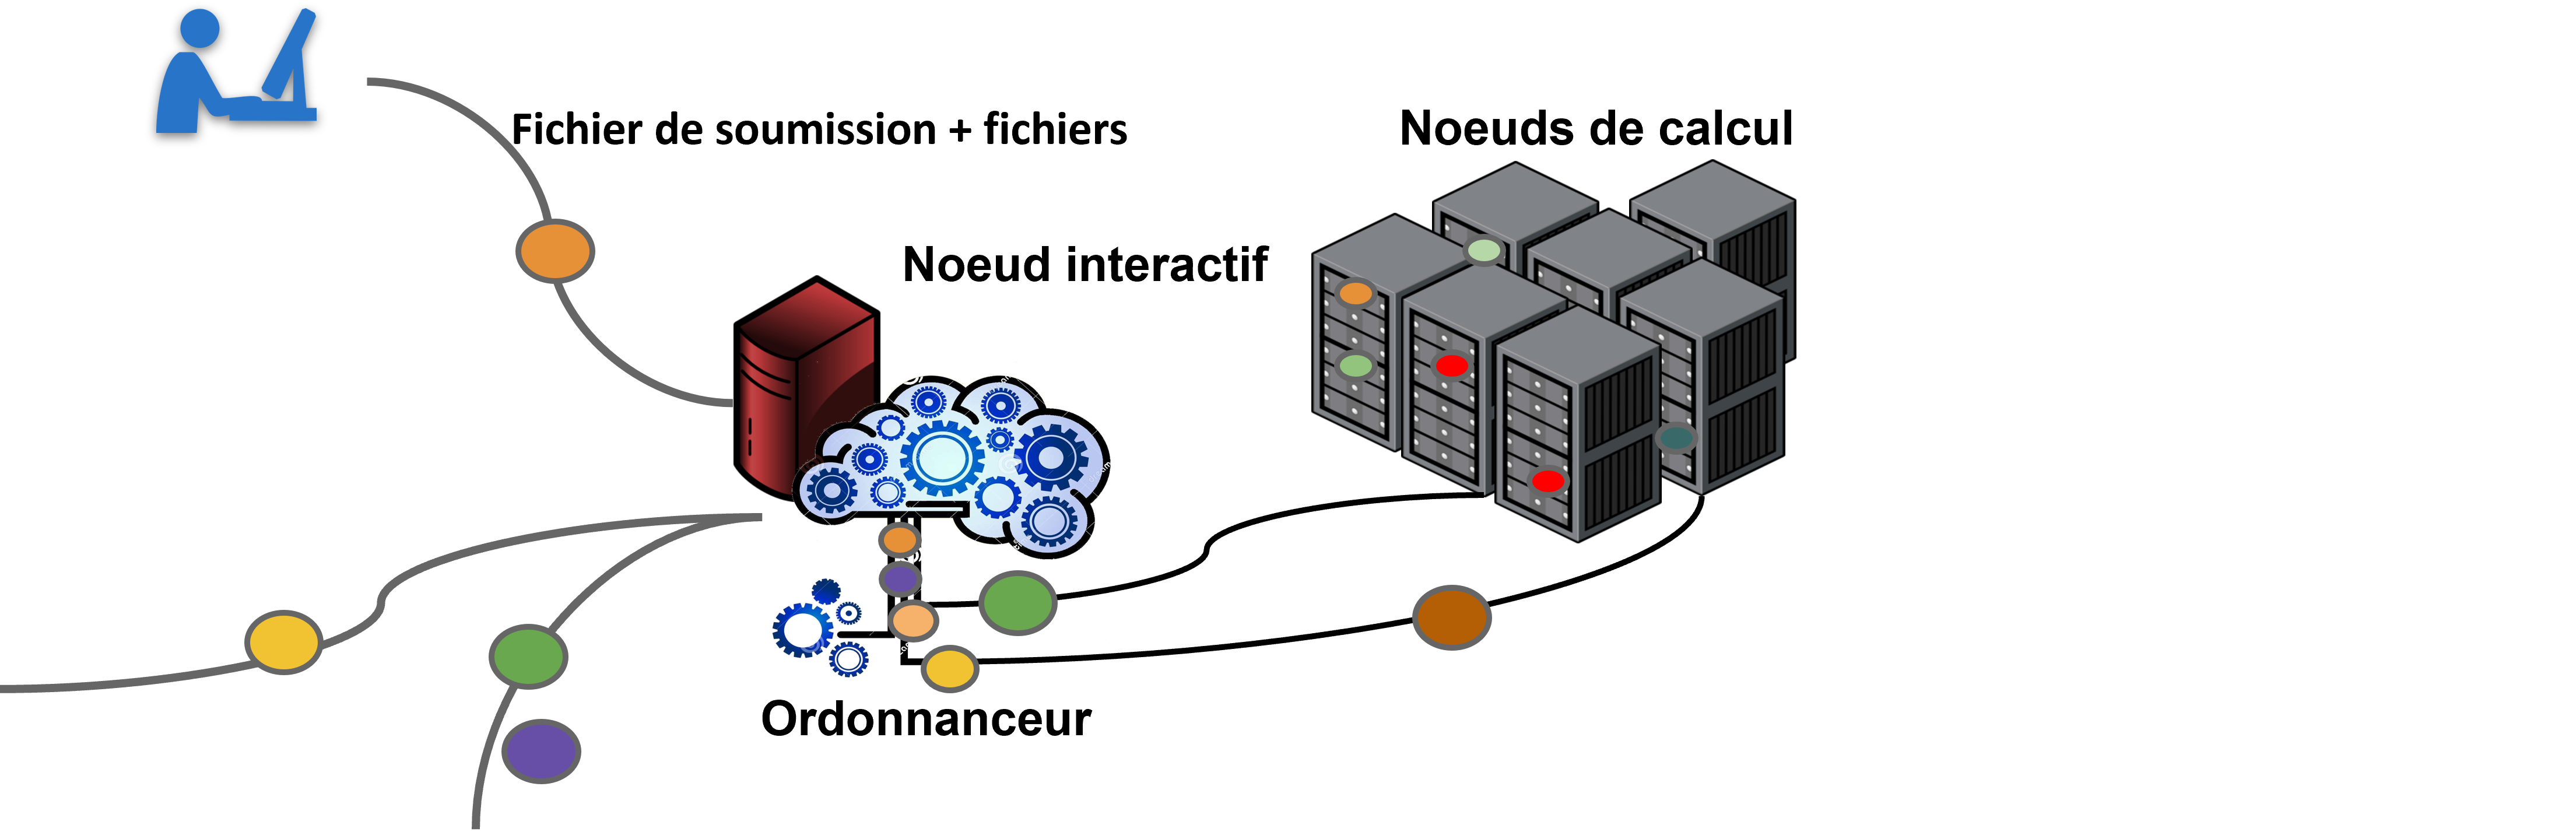

## Connexion à un serveur distant
Nous allons nous connecter à un serveur qui simulera une grappe de calcul à Calcul Canada. Il s'agit d'un environnement JupyterHub https://jupyter.org/hub et simplifie grandement les étapes de connexion à la partie serveur de Paraview. 

D'abord, vous tombez sur le menu de connexion, dans lequel vous sélectionnez Paraview server


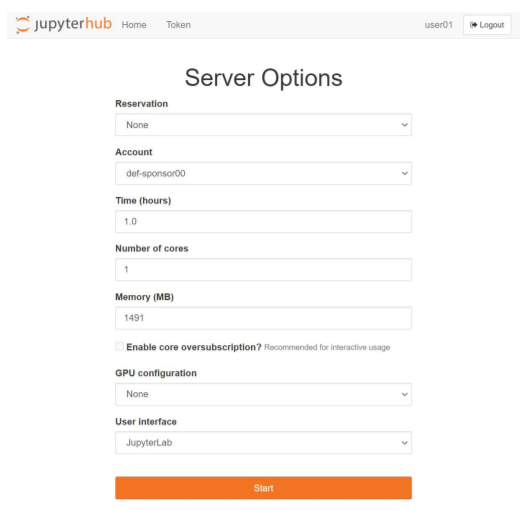

Il y a un temps d'attente, ne désespérez pas!


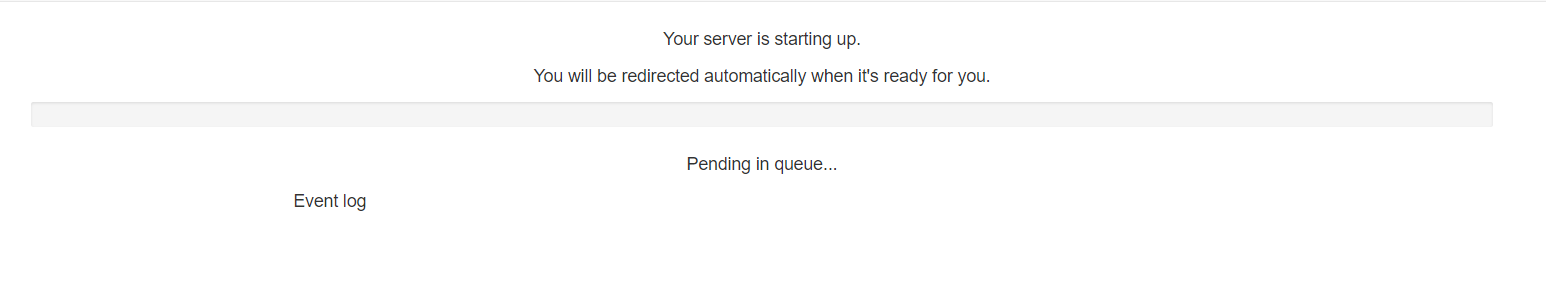

Vous obtenez les instructions de connexion. La première étape (le tunnel SSH) se fait dans un terminal - vous pouvez utiliser powershell, un terminal linux (ou mac), VScode, MobaXterm...


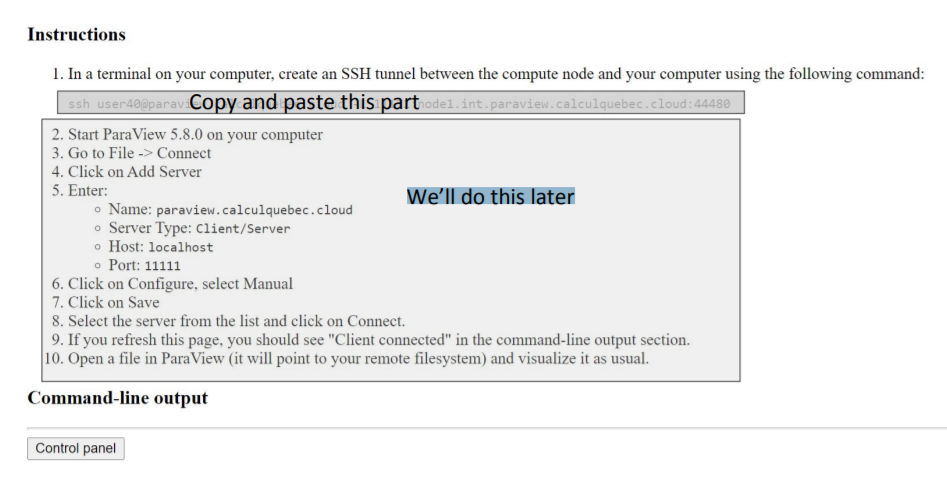

Lors de votre première connexion, vous devrez taper "yes" pour valider l'authenticité 


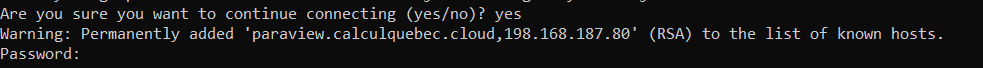



Une fois le tunnel SSH établi, vous pourrez entrer les informations de connexion dans Paraview et vous serez connecté!


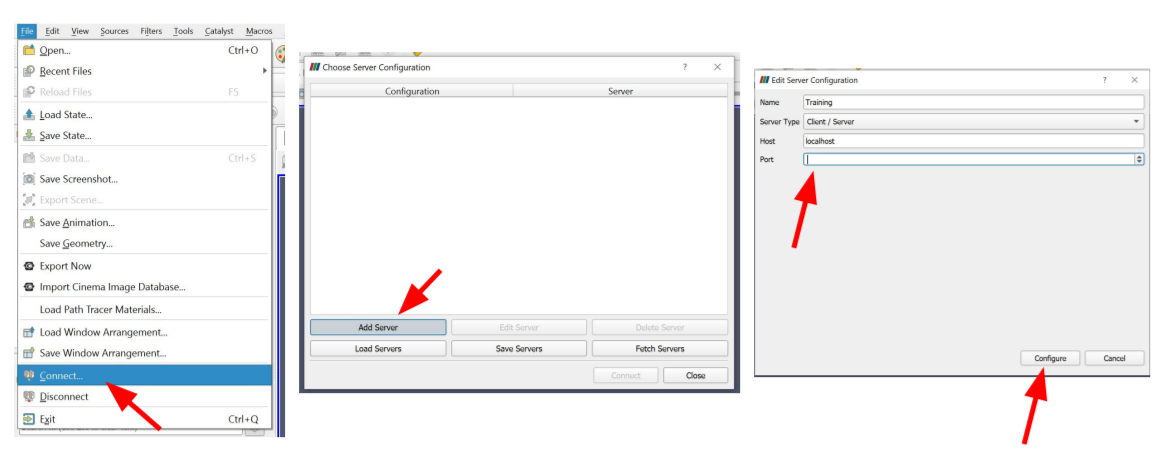



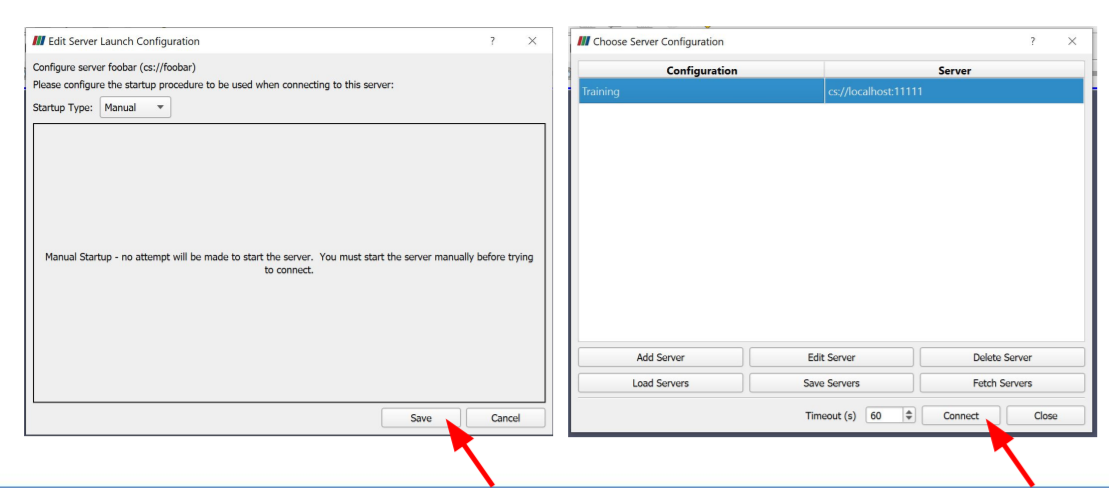


Sur les serveurs de Calcul Canada, la marche à suivre est légèrement différente, mais nous avons des instructions pour vous:

https://docs.computecanada.ca/wiki/ParaView/fr#Visualisation_client-serveur

En gros, les étapes sont les suivantes:
#### CPU
1. Connectez-vous à votre compte sur Béluga, Cedar ou Graham par exemple.
2. Localisez les données à utiliser sur votre espace.
3. Démarrez une session interactive en utilisant la commande salloc
4. Utilisez la commande module load pour charger les modules nécessaires
5. Démarrez Paraview server en utilisant la commande pvserver
6. Dans une autre fenêtre sur votre ordinateur, ouvrez un tunnel SSH en suivant les instructions de pvserver https://www.concordia.ca/ginacody/aits/support/faq/ssh-tunnel.html#:~:text=SSH%20tunneling%2C%20or%20SSH%20port,machine%20via%20a%20secure%20channel.
7. Dans Paraview, ouvrez une connexion en utilisant le port 1111 ou autre selon ce qui est spécifié.

Vous devriez voir la connexion active dans la boîte de gauche de l'interface de Paraview.



# 2. Retour sur la base: filtres, pipelines, vector fields
Dans l'espace central, vous voyez apparaître les objets que vous ajoutez. À gauche, vous voyez le _pipeline_ et les propriétés des objets. Dans la partie du haut, vous voyez des modifications visuelles et des menus additionnels. 

Nous allons commencer par 
1. Sources - cylinder
2. Déplacez le cylindre en cliquant avec le bouton gauche de votre souris. Essayez aussi avec le droit et celui du centre.
3. Changez la vue de Surface à Wireframe
4. Changez la couleur avec Edit Colour Map
5. Ajoutez un cone à partir des sources
6. Vous pouvez ajouter des vues en cliquant une image avec le bouton droit et sélectionnez "link Camera" et ensuite en cliquant sur l'autre image

Voici un résumé du processus impliqué dans le rendu des données chargées:
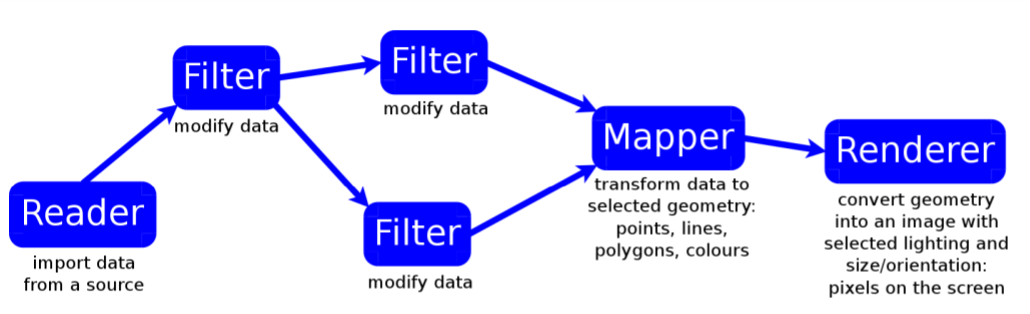

# 3. Scriptage: trace, scripts simples
Paraview fonctionne grâce à l'interface graphique, mais également à l'aide de script. Vous pourriez vouloir utiliser des scripts pour:
1. Automatiser des étapes répétitives ou mineures
2. Documenter et sauvegarder votre processus de travail
3. Utiliser Paraview sur un serveur à partir de la ligne de commandes ou en mode _batch_

Paraview utilise Python comme langage de programmation. Dans l'interface graphique, vous pouvez ouvrir un interpréteur Python avec Python shell où vous pouvez coller et rouler votre code. 

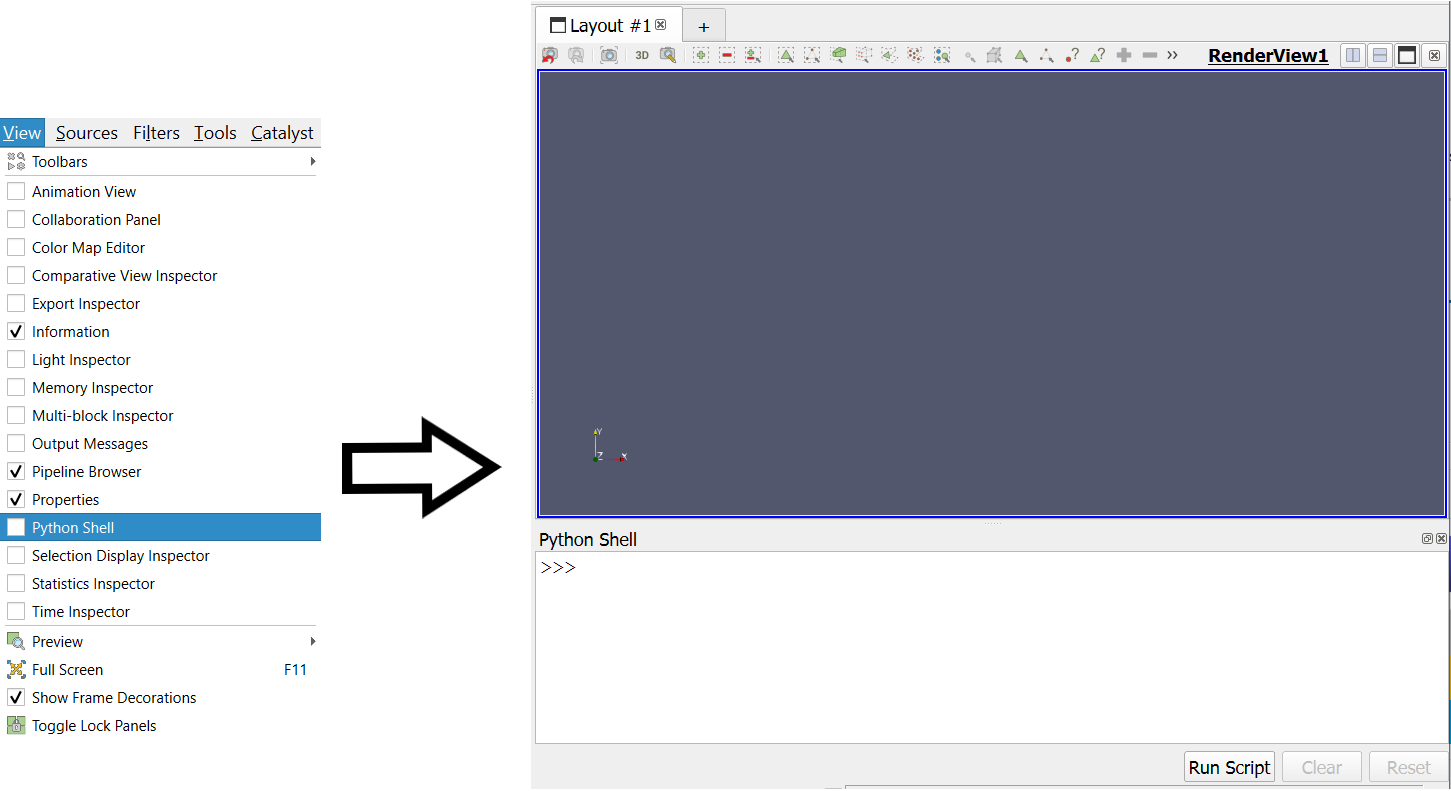

Sans l'interface graphique, vous pouvez utiliser pvpython (shell Python connecté à un serveur Paraview local ou distant). Sur serveur, 

pvbatch --force-offscreen-rendering script.py permet le rendu en série. 

paraview --script=script.py démarre l'interface de Paraview et roule le code automatiquement.

Cependant, vous ne devez pas nécessairement connaître Python pour utiliser des scripts. Il existe un outil nommé _trace_ qui prend note de toutes les étapes de votre processus et les sauvegarde dans un script que vous pouvez réutiliser. Nous allons utiliser cet outil avec un jeu de données simple:

Démarrez trace: Tools - Start Trace

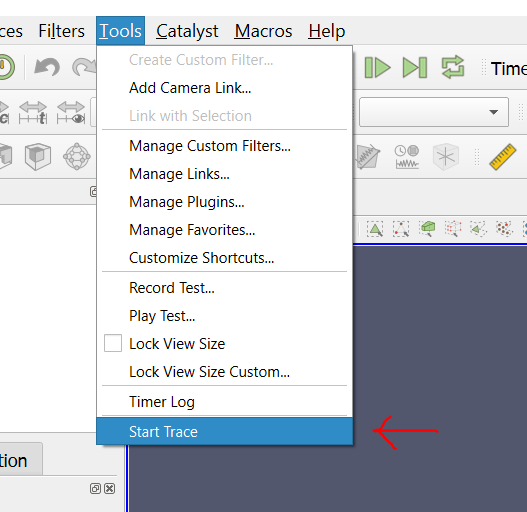

Vous pouvez ajuster le niveau de détail de ce qui est sauvegardé

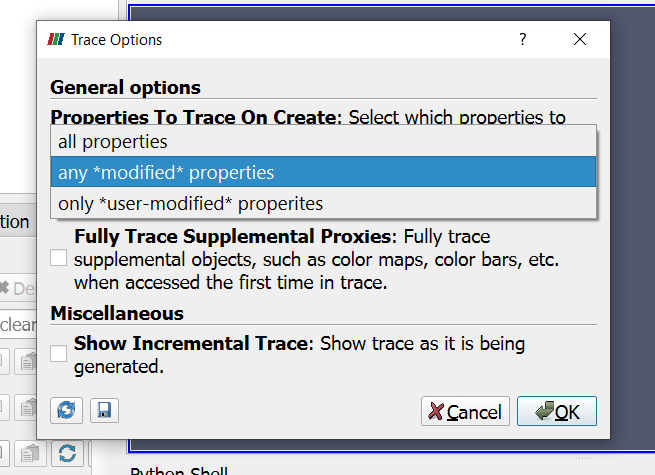

1. Chargez le jeu de données disk_out_ref.ex2
2. Appliquez un premier filtre: Filters - Alphabetical - Extract surface
3. Appliquez un deuxième filtre sur Extract surface: Clip

Arrêtez trace: Tools - Start/Stop Trace

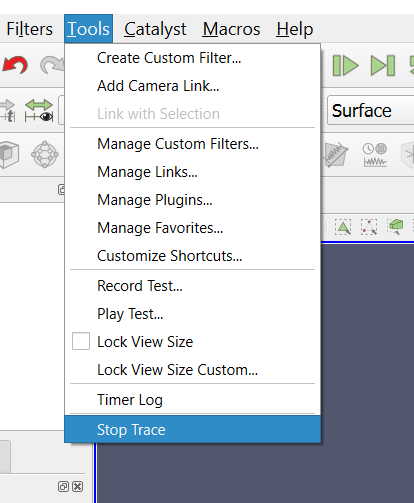

Vous constaterez que Paraview vous offre automatiquement un script que vous pouvez sauvegarder pour le réutiliser. 

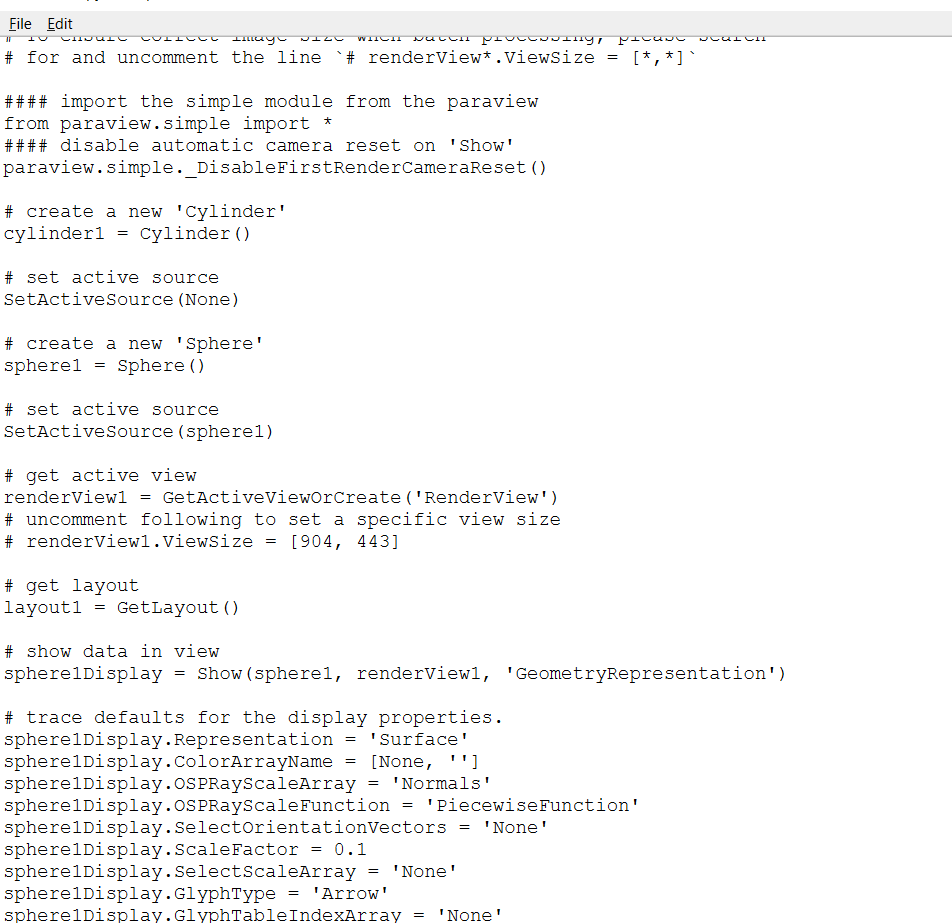


Comme vous constatez, le niveau de détail est très élevé. Ce n'est pas toujours pertinent de garder le maximum de détails, mais ça peut servir d'outil d'apprentissage si vous n'êtes pas familier avec Paraview ou Python. L'interpréteur peut être utilisé indépendamment de l'outil trace. Dans Paraview, cliquez sur "Reset Session". Dans l'interpréteur, tapez le code suivant:

In [ ]:
from paraview.simple import *

sphere = Sphere() # cree l'objet sphere
print(sphere.ThetaResolution) # affiche un des attributs de la sphere
sphere.ThetaResolution = 16 # determine la valeur de la resolution theta

Show() # rend l'objet visible dans la vue
Render()

In [ ]:
help(paraview.simple)
help(Sphere)
help(Show)
help(sphere) # montre seulement les attributs de l'objet
dir(paraview.simple)

Nous allons maintenant créer un _modifier_ notre propre script

In [ ]:
from paraview.simple import *
sphere = Sphere(ThetaResolution = 36, PhiResolution = 18)
wireframe = ExtractEdges(Input=sphere) # Applique Extract Edges a la sphere
Show()
Render()

Remplacez Show() par Show(sphere): comment expliquez-vous la différence?

Remplacez Render() par SaveScreenshot("chemin/vers/wireframe.png") et roulez le avec pvbatch

# 4. Animations avancée avec l'interface graphique et avec un script
Les animations peuvent également être scriptées en python.

Lorsque vous le faites à la main, vous devez ouvrir l'outil Animation View.


1. Chargez les sources Axes et 3D text.
2. Choissez Camera et Orbit
3. Sauvegardez l'animation

* Sauvegarder en .avi vous donnera un vidéo de faible qualité
* Sauvegarder en d'autres formats vous donnera une série d'images

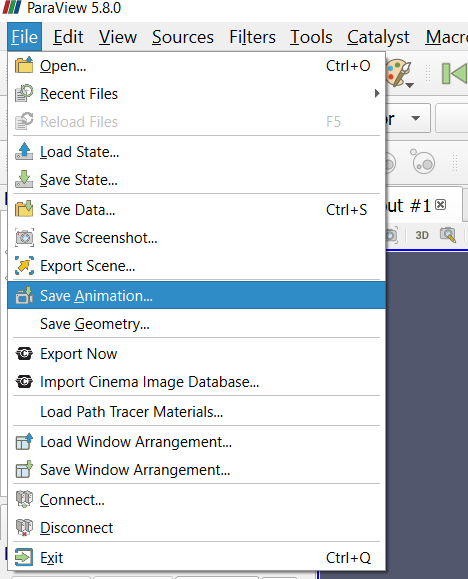

Vous pouvez également faire les animations à l'aide du code.

1. Chargez les sources Axes et 3D text.
2. Comparez le point focal au centre de rotation

In [ ]:
v1 = GetActiveView()
print(v1.CameraFocalPoint)
print(v1.CenterOfRotation)

ResetCamera()

3. Jetez un coup d'oeil aux rotations d'azimuth

In [ ]:
dir(GetActiveCamera())
help(GetActiveCamera().Azimuth)

4. Faites une rotation de 10 degrés 

In [ ]:
camera = GetActiveCamera()
camera.Azimuth(10)
Render()

Lorsque vous avez votre série d'images, vous pouvez les traiter dans des logiciels d'édition vidéo comme Video Editor ou Quicktime. Vous pouvez également convertir les photos en vidéo automatiquement à l'aide de FFmpeg.

In [ ]:
v1 = GetActiveView()
nframes = 360
camera = GetActiveCamera()
for i in range(nframes):
    print(v1.CameraPosition)
    camera.Azimuth(360./nframes)   # rotate by 1 degree
    SaveScreenshot('/chemin/vers/emplacement/sur/votre/ordinateur/frame%04d'%(i)+'.png') # MODIFIEZ CETTE PARTIE

Dans votre fureteur, remplacez la fin de l'URL par _lab_ et ajoutez les fichiers d'images dans un dossier. L'étape 5 vous fera ouvrir un terminal.

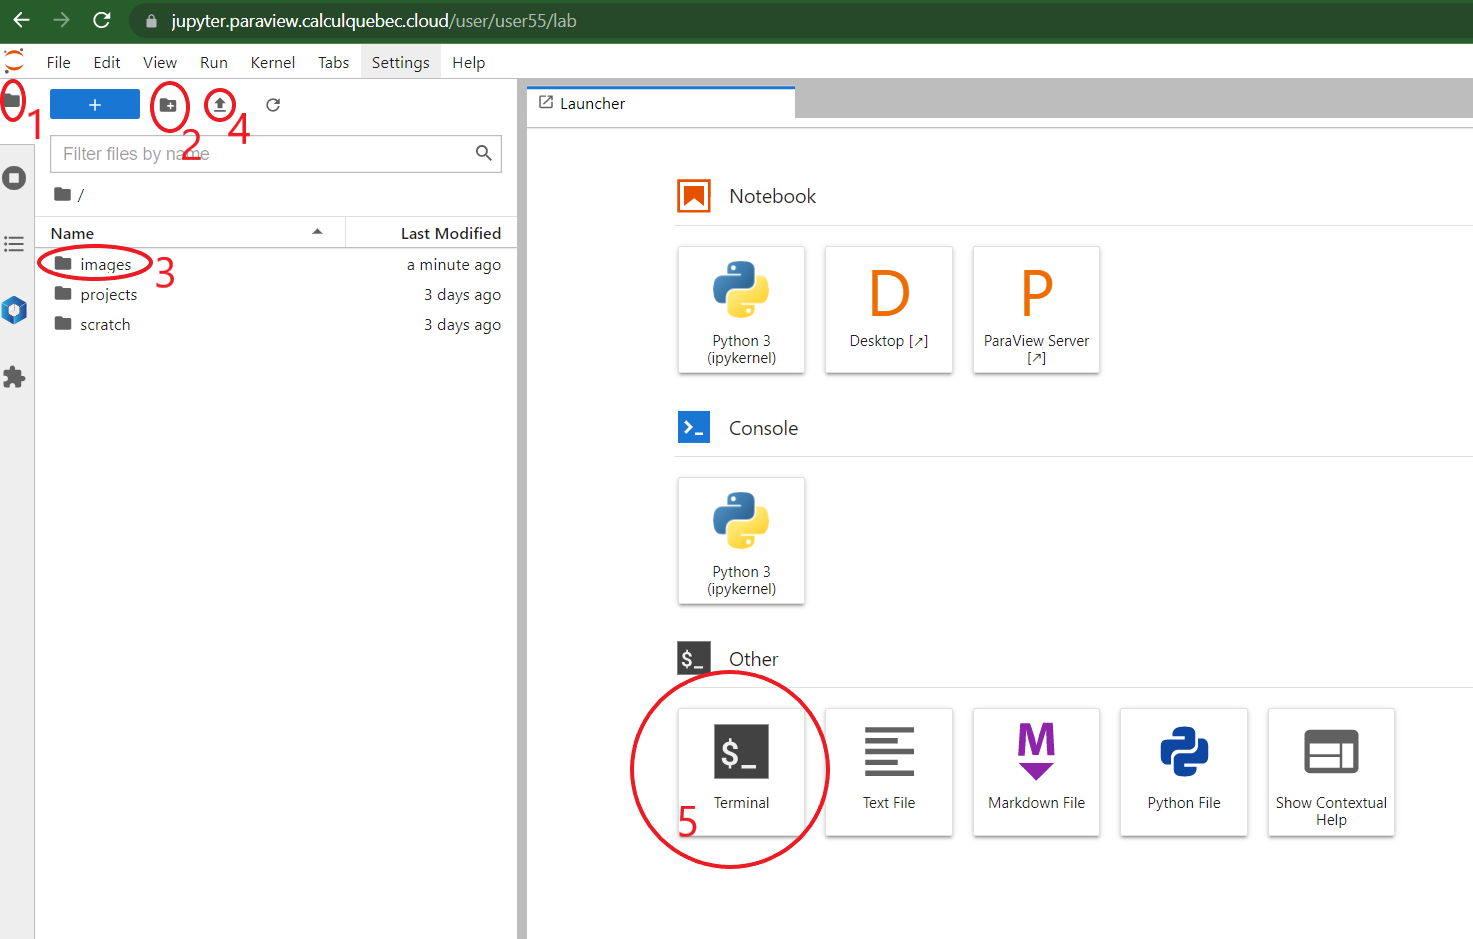

Puis, dans le terminal, adaptez et tapez ces commandes:

In [ ]:
cd images/
ffmpeg -r 30 -i frame%04d.png -c:v libx264 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" spin.mp4

après quelques instants, vous devriez obtenir un fichier nommé spin.mp4 que vous pourrez télécharger.

Vous pouvez répéter ces mêmes opérations avec ce nouveau code.

In [ ]:
v1 = GetActiveView()
initialCameraPosition = v1.CameraPosition[:]   # force a real copy, not a pointer
nframes = 100
for i in range(nframes):
    coef = float(i+0.5)/float(1.5*nframes)  # runs from 0 to 2/3
    print(coef, v1.CameraPosition)
    v1.CameraPosition = [((1.-coef)*a + coef*b) for a, b in zip(initialCameraPosition,v1.CameraFocalPoint)]
    SaveScreenshot('/chemin/vers/emplacement/sur/votre/ordinateur/out%04d'%(i)+'.png') # MODIFIEZ CETTE PARTIE

ffmpeg -r 30 -i out%04d.png -c:v libx264 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" approach.mp4

# 5. Visualisation à distance: Rendu CPU vs GPU
Depuis le début, nous travaillons en mode client-serveur. C'est une des méthodes de visualisation à distance avec Paraview. Vous pourriez avoir un bureau à distance et démarrer l'interface de Paraview à l'aide de VNC, mais il ne s'agit pas de l'option la plus efficace. Vous pourriez utiliser votre script en mode batch série ou parallèle. 

À Calcul Canada, nous avons un nombre de supercalculateurs disponibles pour la visualisation à distance avec Paraview: Béluga, Cedar et Graham.
* Ils sont situés à McGill, SFU et U of Waterloo
* Contiennent des CPUs et des GPUs
* Contiennent des noeuds avec différentes tailles de mémoire RAM allant de 128GB à 3TB
* https://docs.computecanada.ca/wiki/Cedar
* https://docs.computecanada.ca/wiki/Graham
* https://docs.computecanada.ca/wiki/Beluga

### Est-ce que je devrais choisir un CPU ou un GPU?
Ça dépend! En règle générale, les GPUs sont plus rapides pour faire les rendus graphiques. Cependant, les librairies modernes comme OSPRay et OpenSWR (Intel) ont réduit les différences de rapidités dans beaucoup de cas d'utilisation de Paraview. 

Notez que les CPUs sont des ressources beaucoup plus abondantes à Calcul Canada que les GPUs! Vous aurez moins de temps d'attente et plus de choix, je vous suggère donc de commencer par le rendu sur CPU et passer aux GPUs si nécessaire. Ici, nous travaillons sur les CPUs de Béluga Cloud.

### Combien de processeurs devrais-je utiliser?

Ça dépend. Les goulots d'étranglement sont la mémoire physique, la vitesse de lecture sur le disque et seulement ensuite le temps de rendu CPU/GPU. 
* Pour des jeux de données structurés: Points structurés, Grilles rectilinéaires, Grilles structurées:

  Un coeur par ~20 millions de cellules (5-10 millions de cellules encore mieux)
  
  
* Pour des jeux de données non structurés: Points non structurés, Données polygonales, Grilles non structurées:
  
  Un coeur par million de cellules (250k-500k cellules encore mieux)
  
Par exemple, un jeu de données de 80Go sur un noeud de base de 128GB de RAM et 32 coeurs (3.5Go/coeur) = 23 coeurs pour le jeu de données. Ensuite, vous devez compter les potentielles copies, les filtres, etc, il vous faut un minimum de 32 coeurs. Dépendant des filtres, vous serez plus confortable avec 48-64 coeurs.

Bon à savoir:
* Évitez l’explosion de données: Paraview essaye de limiter les “fausses” copies qui pointent vers l’original
* Investiguez toujours les besoins des filtres: 
    des fois, pas le choix de faire une copie! <= à éviter si vous allez manquer de RAM!
    des fois, les filtres créent des données non-structurées à partir de données structurées!
* Élaguez les données dès le début! Ex: 
    Démarrer avec un volume, mais en faire une surface
    Clip si l'information d’intérêt est à l’intérieur
    “Extract subset” si on ne sait pas trop

### Comment savoir ce que j'utilise?
Il y a un menu dans l'interface qui vous permet de visualiser l'utilisation de la mémoire par les différents coeurs. Vous pouvez l'ouvrir avec View - Memory Inspector.

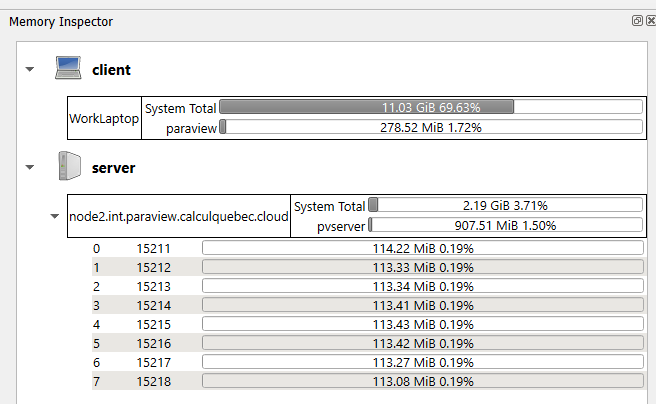

### Comment contrôler la charge de rendu est partagée entre mon ordinateur et le serveur distant?
L'équipe de Paraview a développé plusieurs algorithme qui permettent de compresser l’image et de la recomposer selon les ressources locales!

* Squirt - réduit profondeur des couleurs
* Zlib - meilleur résultat, plus lent
* LZ4 - récent, rapide

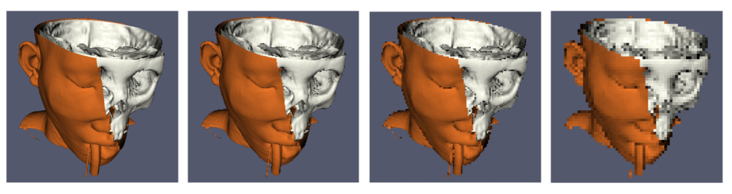

Vous avez également du contrôle sur le niveau de détail dans le rendu (Level of Detail: LOD) dans le menu Render View - Remote/Parallel Rendering options

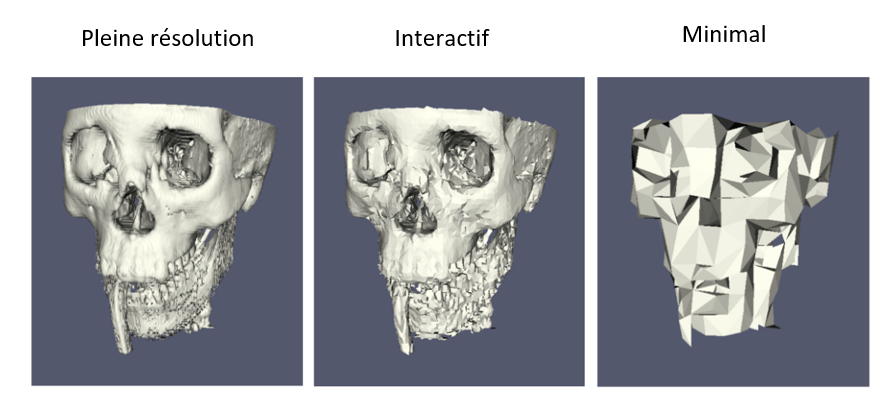

Lorsque vous effectuez un déplacement dans la fenêtre de visualisation, la résolution tombe automatiquement à intéractif.

Vous pouvez aussi ajuster l'option Remote Render Threshold (valeur minimale en MB au-dessus de laquelle le rendu se fera à distance): 

* par défaut 20MB. 
* 0MB = rendu totalement à distance. 

Il se peut que vous ayez besoin de faire quelques essais pour trouver une valeur optimale.

### Mais le rendu avec plusieurs coeurs, ça se fait comment?

Encore une fois, Paraview est équipé de plusieurs modes de rendu qui influenceront la rapidité du rendu et vos besoins en RAM. Nous explorerons le rendu parallèle avec une figure simple pour comprendre les fonctionnement de base.
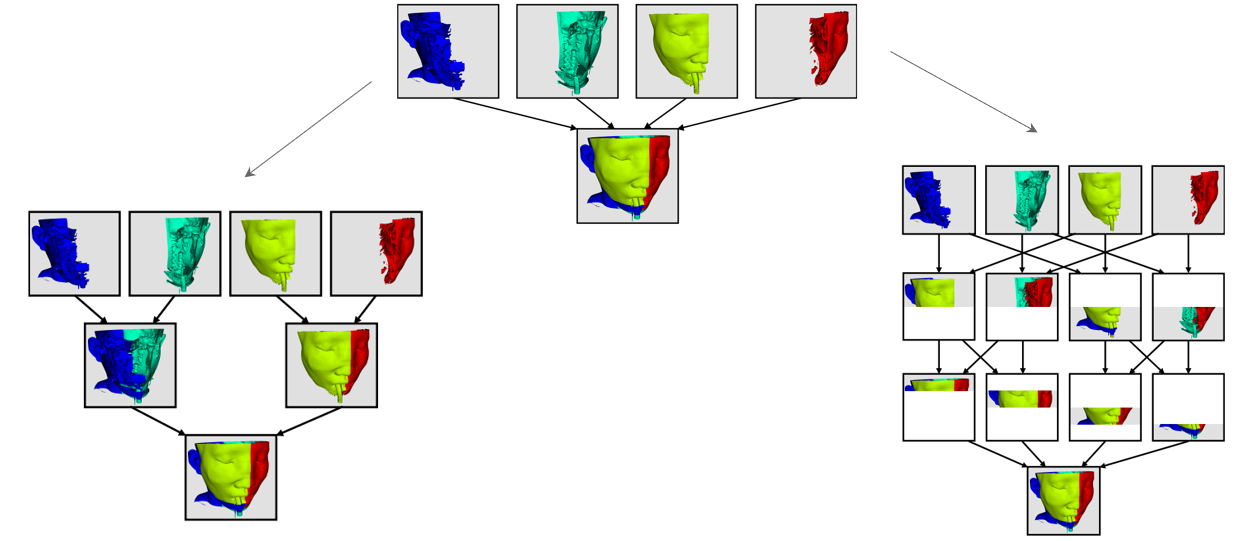

Dans un fichier appelé vtksphere.py:

In [ ]:
from paraview.simple import *
sphere = Sphere()
rep = Show()
ColorBy(rep, ("POINTS", "vtkProcessId"))
Render()
rep.RescaleTransferFunctionToDataRange(True)
Render()
WriteImage("parasphere.png")

Sinon, prendre Sources - Sphere et choisir la coloration par vtkProcessId

### Tous les rendus parallèles ne sont pas nés égaux - la partition de données et les _Ghost Levels_
Les algorithmes de séparation des jeux de données créer des zones partagées par deux processus nommées _cellules fantômes_ ou _ghost cells_

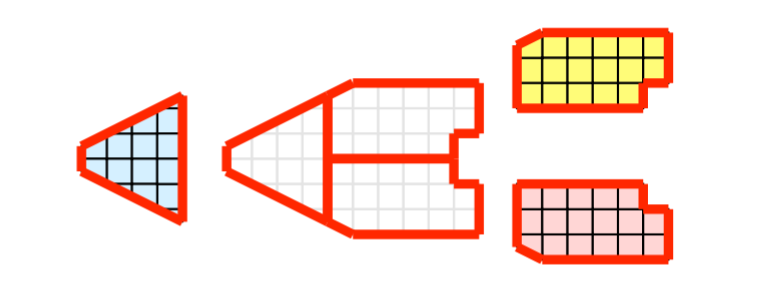

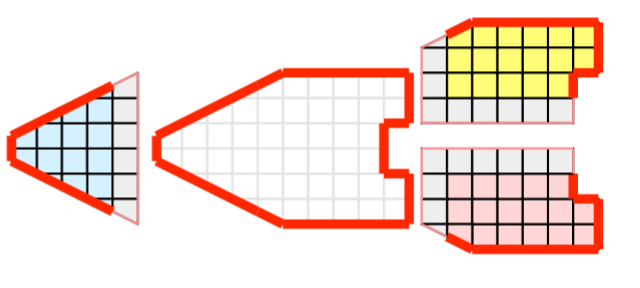

